# XML gaze data to pandas data and figures

## Import XML to dict

In [1]:
#additional helpful source:
#http://docs.python-guide.org/en/latest/scenarios/xml/

import xmltodict
import pandas as pd

In [2]:
filepath = 'data2.xml'

with open(filepath) as fd:
    xml = xmltodict.parse(fd.read())

In [3]:
'''Check the data structure'''
xml['Data']['Gaze'][0]

OrderedDict([(u'Left',
              OrderedDict([(u'Ray',
                            OrderedDict([(u'@valid', u'True'),
                                         (u'@timestamp', u'2436408044283'),
                                         (u'@origin',
                                          u'(0000.72750710, 0000.88932070, -0001.52425400)'),
                                         (u'@direction',
                                          u'(0000.10425780, 0000.06111056, -0000.99267110)')]))]))])

## Dict to pandas

In [4]:
'''Read attributes to pandas format'''

gazes = xml['Data']['Gaze']
data = {}

for gaze in gazes:
    for k, v in gaze.items():
        for k_ray, v_ray in v.items():
            data.setdefault(k.lower()+'_oz', []).append(str(v_ray['@origin'][1:-2].split(",")[2]))
            data.setdefault(k.lower()+'_oy', []).append(str(v_ray['@origin'][1:-2].split(",")[1]))
            data.setdefault(k.lower()+'_ox', []).append(str(v_ray['@origin'][1:-2].split(",")[0]))
            data.setdefault(k.lower()+'_dz', []).append(v_ray['@direction'][1:-2].split(",")[2])
            data.setdefault(k.lower()+'_dy', []).append(v_ray['@direction'][1:-2].split(",")[1])
            data.setdefault(k.lower()+'_dx', []).append(v_ray['@direction'][1:-2].split(",")[0])

df = pd.DataFrame(data)

In [5]:
'''Short check'''
df.head(2)

,left_dx,left_dy,left_dz,left_ox,left_oy,left_oz,right_dx,right_dy,right_dz,right_ox,right_oy,right_oz
0,0000.10425780,0000.06111056,-0000.9926711,0000.72750710,0000.88932070,-0001.5242540,0000.04352655,0000.03371385,-0000.9984833,0000.66689680,0000.88721380,-0001.5286140
1,0000.10101180,0000.05310239,-0000.9934670,0000.72752490,0000.88960340,-0001.5237460,0000.04536549,0000.03908587,-0000.9982055,0000.66697820,0000.88707540,-0001.5292100


In [6]:
'''Check the length and data format'''
len(df), type(df.left_ox[0])

(1515, str)

## Data massage

In [7]:
'''Remove Nan'''
df=df[df.left_ox!='NaN']

In [8]:
'''Check that there are no NaN'''
df.tail(2)

,left_dx,left_dy,left_dz,left_ox,left_oy,left_oz,right_dx,right_dy,right_dz,right_ox,right_oy,right_oz
1404,-0000.09055937,-0000.41718570,-0000.9042981,0000.75850140,0000.86652120,-0001.5229970,-0000.05478483,-0000.50264570,-0000.8627549,0000.69757370,0000.86818640,-0001.5227200
1405,-0000.04085603,-0000.58045140,-0000.8132693,0000.75797570,0000.86675240,-0001.5225730,-0000.06875179,-0000.55176390,-0000.8311617,0000.69769440,0000.87634830,-0001.5078020


In [9]:
'''Remove extra white space and cpnvert to float format'''
cols = [i for i in df.columns]
df[cols] = df[cols].replace(' ','').astype(float)

In [10]:
'''Normed z value: inverse of (min-max scaling + .1)
.1 added to avoid 0'''
norm = lambda x: 1/(((x - x.min()) / (x.max()-x.min()))+.1)
df['left_ndz'] = df['left_dz'].transform(norm)
df['right_ndz'] = df['right_dz'].transform(norm)

In [11]:
df['right_ndz'].min(), df['right_ndz'].max()

(0.90909090909090906, 10.0)

## Figures

In [12]:
import seaborn as sns
sns.set(style="white", color_codes=True)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

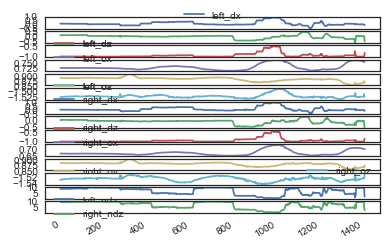

In [13]:
'''Just out of curiosity'''
df.plot(subplots=True);

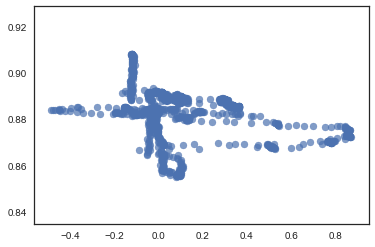

In [14]:
'''Left direction'''
plt.scatter(df['left_dx'], df['left_oy'], alpha=.7)

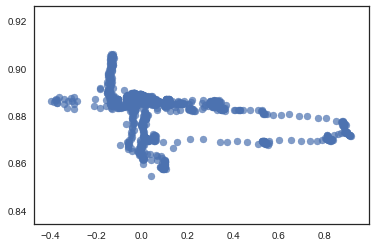

In [15]:
'''Right direction'''
plt.scatter(df['right_dx'], df['right_oy'], alpha=.7);

### Plot x and y

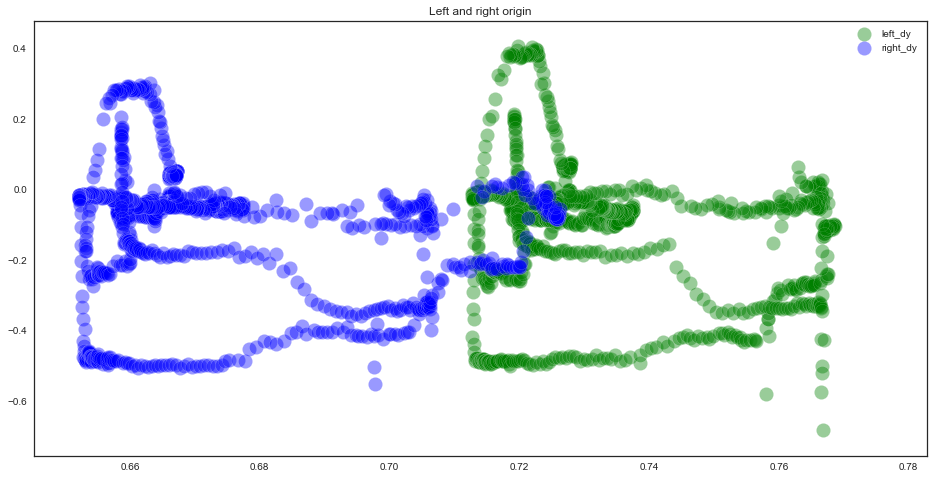

In [16]:
data = ('left', 'right')
colors = ("green", "blue")
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for data, color in zip(data, colors):
    x = df[data+'_ox']
    y = df[data+'_dy']
    ax.scatter(x, y, alpha=0.4, c=color, edgecolors='w', s=200)
 
plt.title('Left and right origin')
plt.legend(loc=1)
plt.savefig('gaze_data2_origin.png', format='png', dpi=300);

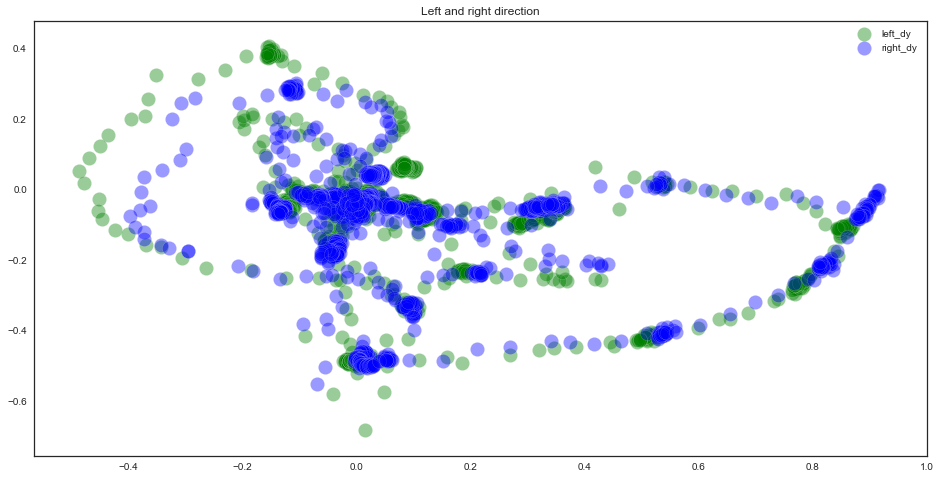

In [17]:
data = ('left', 'right')
colors = ("green", "blue")
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for data, color in zip(data, colors):
    x = df[data+'_dx']
    y = df[data+'_dy']
    ax.scatter(x, y, alpha=0.4, c=color, edgecolors='w', s=200)
 
plt.title('Left and right direction')
plt.legend(loc=1)
plt.savefig('gaze_data2_direction.png', format='png', dpi=300);

### Plot x, y, z
z visualized as the point size

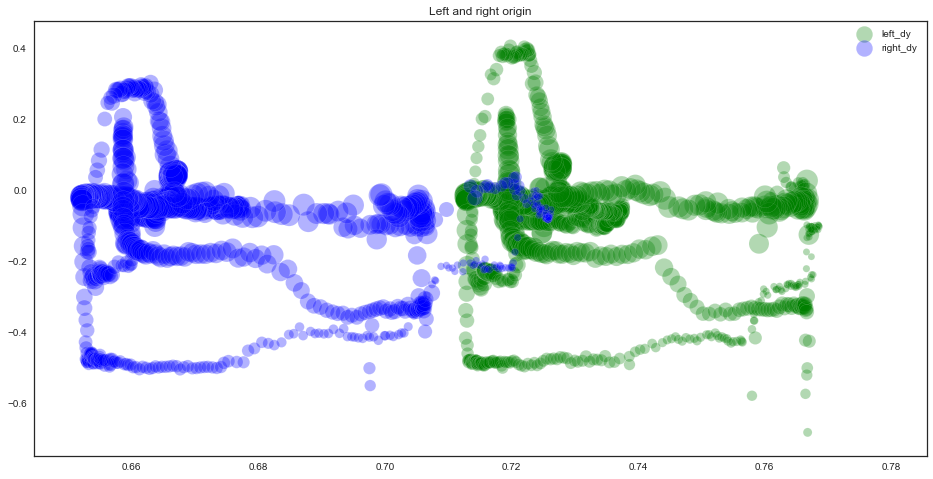

In [18]:
data = ('left', 'right')
colors = ("green", "blue")
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for data, color in zip(data, colors):
    x = df[data+'_ox']
    y = df[data+'_dy']
    z = df[data+'_ndz']
    ax.scatter(x, y, alpha=0.3, c=color, edgecolors='w', s=50*z)
 
plt.title('Left and right origin')
plt.legend(loc=1)
plt.savefig('gaze_data2_origin_z.png', format='png', dpi=300);

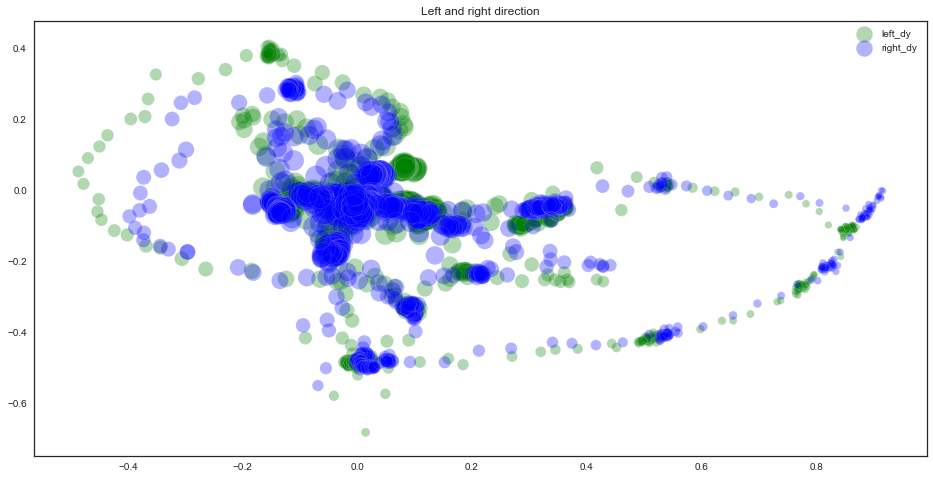

In [19]:
data = ('left', 'right')
colors = ("green", "blue")
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for data, color in zip(data, colors):
    x = df[data+'_dx']
    y = df[data+'_dy']
    z = df[data+'_ndz']
    ax.scatter(x, y, alpha=0.3, c=color, edgecolors='w', s=50*z)
 
plt.title('Left and right direction')
plt.legend(loc=1)
plt.savefig('gaze_data2_direction_z.png', format='png', dpi=300);